# **Project: IndustryGPT: Specialized LLM Bot Using Pre-Trained Models: Healthcare and Pharmaceuticals (Mental Health)**



GITHUB Link:

https://github.com/Shuvadip007/Industry-Immersion-Track-chat-bot

# **Project Goal**
The primary goal of this capstone project is to develop an industry-specific Large Language Model (LLM) Bot using pre-trained models from platforms such as Hugging Face. Students will be tasked with selecting one industry from a provided list, gathering relevant data, fine-tuning a pre-trained LLM, and demonstrating the bot's capability to engage users effectively by providing accurate and contextually appropriate responses.

**Here are some mental health statistics:**
### **Global**
In 2019, 970 million people, or 1 in 8 people, worldwide had a mental disorder, with anxiety and depression being the most common. The COVID-19 pandemic in 2020 caused a significant increase in the number of people with anxiety and depression, with estimates of a 26% and 28% increase respectively.
### **India**
The World Health Organization (WHO) estimates that India has a burden of 2443 disability-adjusted life years (DALYs) per 100,000 people due to mental health problems. The age-adjusted suicide rate is 21.1 per 100,000 people. As of 2017, more than 14% of India's population suffered from some form of mental disorder, with older adult females being the majority.

* In India, every seventh person suffers from some form of mental disorder.
* The epidemiology of mental disorders, specifically, depression on a global scale, has been vastly studied.
* Today, it is regarded as the leading contributor to disease burden and morbidity worldwide, that may even result in suicide if left untreated.
* Risk factors, relative to developing depressive and anxiety disorders, include bullying victimization, childhood sexual abuse, intimate partner violence, and lead exposure as an environmental risk factor which can lead to idiopathic developmental intellectual disability. * Further, chronic levels of unmanaged stress and anxiety are known to take a toll on the physical and mental health of an individual.
* A recent study reflected that 74% of Indians suffered from stress while 88% suffered from some kind of anxiety disorder.
* Some of the symptoms include increased heart rates, hyperventilation, chronic fatigue and difficulties with concentration.
* Studies reported a significant increase in the number of cases of stress and anxiety among Indians since the pandemic.

In [2]:
!pip install streamlit
!pip install streamlit-chat
!pip install langchain
!pip install -U langchain-community
!pip install langchain-huggingface
!pip install pypdf
!pip install faiss-cpu
!pip install ctransformers
import streamlit as st
from streamlit_chat import message
from langchain.chains import ConversationalRetrievalChain
from langchain.document_loaders import PyPDFLoader, DirectoryLoader
from langchain_huggingface import HuggingFaceEmbeddings  # Updated import
from langchain_community.vectorstores import FAISS  # Updated import
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.memory import ConversationBufferMemory
from langchain.llms import CTransformers
from transformers import AutoModel

2025-02-06 09:27:01.290 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [1]:
!pip install gradio langchain transformers faiss-cpu ctransformers

In [3]:
# Load the PDF files from the path
loader = PyPDFLoader('/content/CBSE_MH_Manual data.pdf')
documents = loader.load()

In [4]:
# Split text into chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
text_chunks = text_splitter.split_documents(documents)

# Create embeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2",
                                   model_kwargs={'device': "cpu"})

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
import gradio as gr
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings    # Replace with your actual embeddings class
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationalRetrievalChain
from langchain.llms import CTransformers  # Ensure you have CTransformers installed
#from your_module import text_chunks, embeddings  # Replace with your actual data sources

# Initialize vector store, LLM, and chain
vector_store = None
chain = None
setup_error = None

try:
    # Create the vector store from documents and embeddings
    vector_store = FAISS.from_documents(text_chunks, embeddings)
except IndexError as e:
    setup_error = f"An error occurred during vector store creation: {e}"
except Exception as e:
    setup_error = f"An unexpected error occurred: {e}"

if vector_store is not None:
    try:
        # Initialize the Language Model
        llm = CTransformers(
        model = "TheBloke/Llama-2-7B-Chat-GGUF",
        model_type="llama",
        config={'max_new_tokens': 128, 'temperature': 0.01}
        )

        # Initialize memory for conversation history
        memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

        # Create the Conversational Retrieval Chain
        chain = ConversationalRetrievalChain.from_llm(
            llm=llm,
            chain_type='stuff',
            retriever=vector_store.as_retriever(search_kwargs={"k": 2}),
            memory=memory
        )
    except Exception as e:
        setup_error = f"An error occurred during LLM or chain setup: {e}"

def conversation_chat(query, history):
    """
    Handles the conversation logic by querying the chain and updating history.

    Args:
        query (str): The user's input question.
        history (list): The chat history as a list of (user, bot) tuples.

    Returns:
        list: Updated chat history.
    """
    if setup_error:
        # If there was an error during setup, append it to the history
        history.append((query, setup_error))
        return history
    try:
        # Query the Conversational Retrieval Chain
        result = chain({"question": query, "chat_history": history})
        answer = result["answer"]
        # Append the user's query and the bot's response to the history
        history.append((query, answer))
    except Exception as e:
        # Handle any exceptions during the conversation
        history.append((query, f"An error occurred: {e}"))
    return history

def handle_submit(user_input, history):
    """
    Handles the submit action from the user.

    Args:
        user_input (str): The user's input question.
        history (list): The current chat history.

    Returns:
        tuple: Updated chat history for display and state.
    """
    if not user_input:
        # If the user input is empty, return the current history unchanged
        return history, history
    # Update the history with the new user input and bot response
    updated_history = conversation_chat(user_input, history)
    return updated_history, updated_history

# Define the Gradio interface
with gr.Blocks() as demo:
    # Title of the application
    gr.Markdown("# Your Therapist 👩‍⚕️")

    # Check if there was a setup error
    if setup_error:
        # Display the error message to the user
        gr.Markdown(f"**Error:** {setup_error}")
    else:
        # Initialize the Chatbot component to display the conversation
        chatbot = gr.Chatbot(label="Chat History")

        # Create a row for input components
        with gr.Row():
            with gr.Column():
                # Textbox for user to input questions
                user_input = gr.Textbox(
                    placeholder="Ask about your Mental Health",
                    label="Question"
                )
                # Button to submit the question
                submit_button = gr.Button("Send")

        # State to keep track of chat history
        state = gr.State([])

        # Define the action when the submit button is clicked
        submit_button.click(
            handle_submit,
            inputs=[user_input, state],
            outputs=[chatbot, state]
        )

# Launch the Gradio interface
demo.launch()


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

llama-2-7b-chat.Q2_K.gguf:   0%|          | 0.00/2.83G [00:00<?, ?B/s]

<ipython-input-5-a34a252fd2aa>:32: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)
/usr/local/lib/python3.11/dist-packages/gradio/components/chatbot.py:282: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://11f438bc2e15a8ebd8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


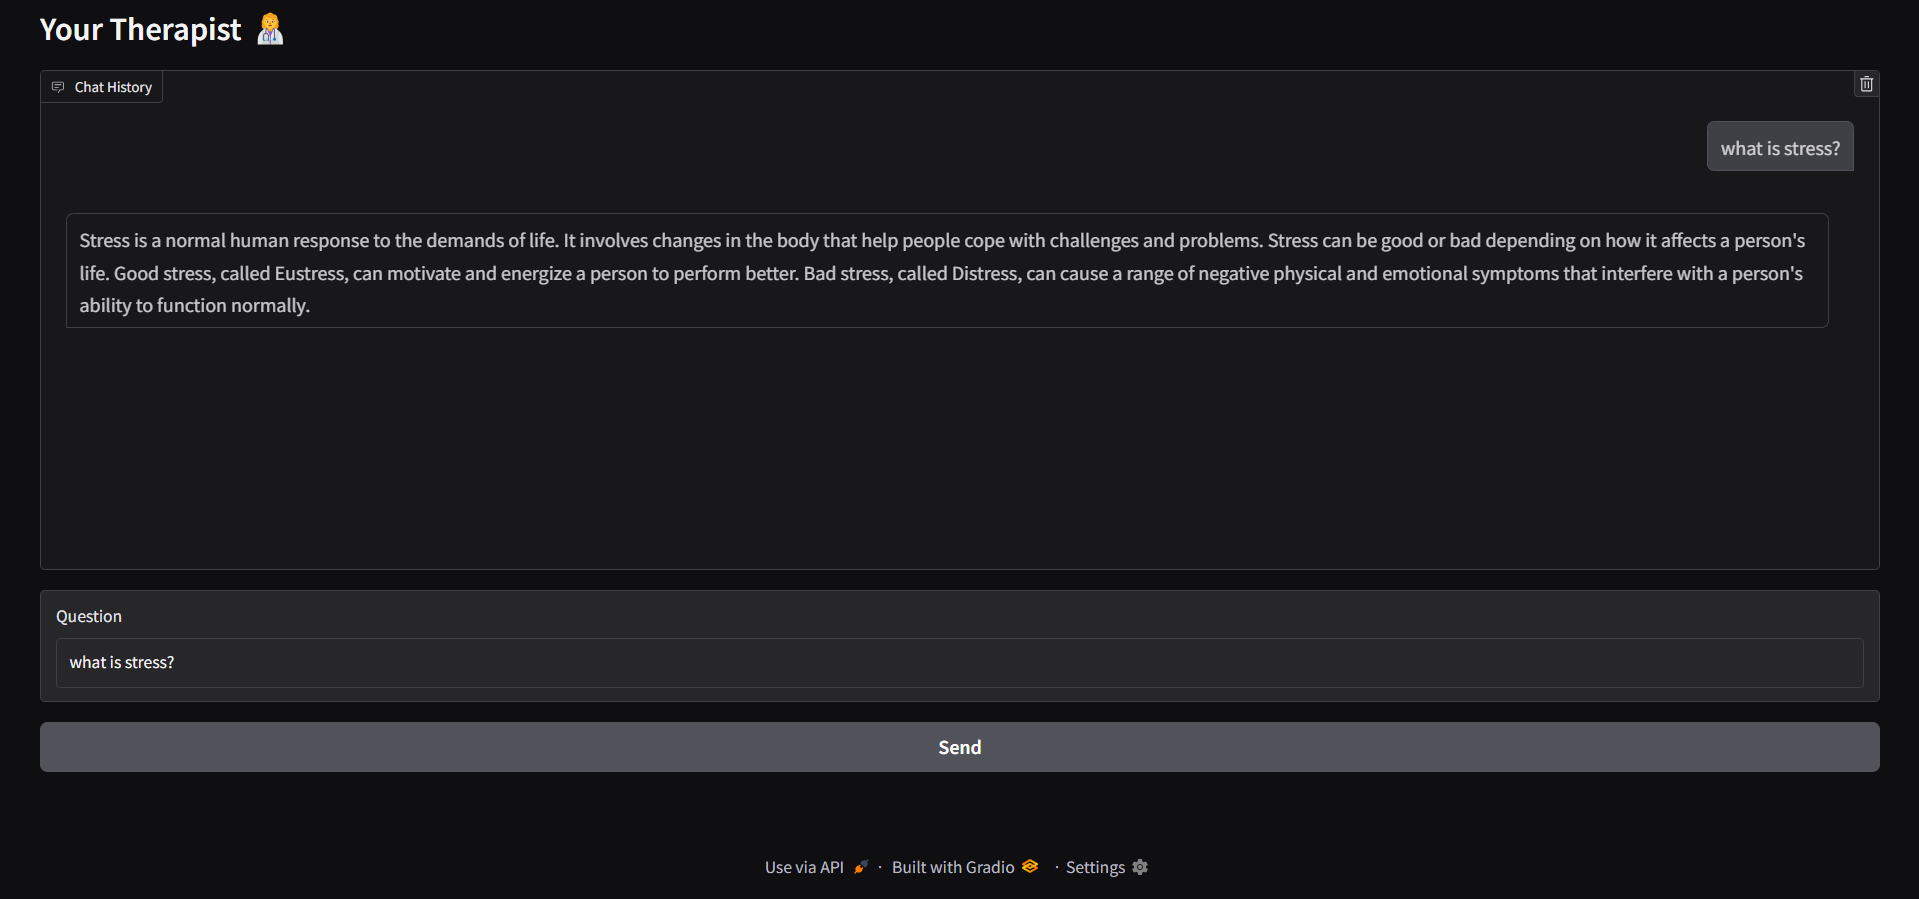